# Imports

In [2]:
# If Shapley Value package shap is not installed, run this to install it
# conda install -c conda-forge shap

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn import metrics
import statsmodels.api as sm
import shap

%matplotlib inline

# Get Cleaned Train Data

In [4]:
df_cl = pd.read_csv("../datasets/train_cleaned.csv")

# Modeling

### Define X & y

In [5]:
nbhd_list = ['Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 
             'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
             'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
             'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
             'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 
             'Neighborhood_StoneBr']

In [6]:
# Define X & y variables
X_list = ['Log Gr Liv Area', 'Overall Qual', 'Age At Sale', 'Log Lot Area', 'Lot Area > 30k',
          'Log 1st Flr SF', 'Kitchen Qual_TA', 'Kitchen Qual_Gd', 'Years Since Remod/Add',
          'HasBsmtFullBath', 'BsmtFin Type 1_Unf', 'BsmtFin SF 1', 'HasAvGdBsmtExposure',
          'HasFireplace', 'Garage Cars']
X = df_cl[X_list]
y = df_cl["Log Sale Price"]

In [7]:
X_list

['Log Gr Liv Area',
 'Overall Qual',
 'Age At Sale',
 'Log Lot Area',
 'Lot Area > 30k',
 'Log 1st Flr SF',
 'Kitchen Qual_TA',
 'Kitchen Qual_Gd',
 'Years Since Remod/Add',
 'HasBsmtFullBath',
 'BsmtFin Type 1_Unf',
 'BsmtFin SF 1',
 'HasAvGdBsmtExposure',
 'HasFireplace',
 'Garage Cars']

In [8]:
# plt.figure(figsize=(12,12))
# df_mv = df_cl[X_list]
# sns.heatmap(df_mv.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True);

### Create train test split on dataframe

In [9]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

### Instantiate models

In [10]:
# Instantiate model
lm = LinearRegression()

### Cross Validation

In [11]:
# Run cross validation
cross_val_score(lm, X_train, y_train, cv=5).mean()

0.8521589167289907

### Model Fit & Evaluation

In [12]:
# Fit model
lm.fit(X_train, y_train);

In [13]:
# Score training data
lm.score(X_train, y_train)

0.8653715056156283

In [14]:
# Score test data
lm.score(X_test, y_test)

0.8625431117837254

### Check residuals

In [15]:
preds = lm.predict(X_test)

In [16]:
exp_preds = np.exp(preds)
exp_preds.mean()

180392.7070634104

In [17]:
residuals = np.exp(y_test) - exp_preds

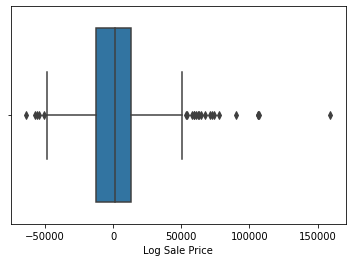

In [18]:
sns.boxplot(residuals)

In [19]:
bad_vars = pd.DataFrame(residuals.T)

In [20]:
bad_vars.sort_values(by="Log Sale Price")

,Log Sale Price
1628,-64073.494552
483,-57427.508380
393,-55590.912441
1270,-54349.422391
408,-51016.109672
...,...
1052,89890.167647
1503,105992.908765
1771,106338.267094
480,106868.004413


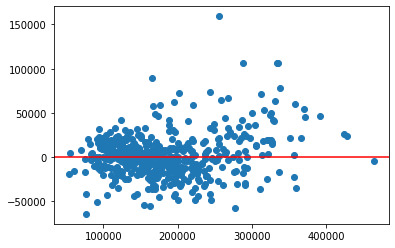

In [21]:
plt.scatter(exp_preds, residuals)
plt.axhline(0, color='r');

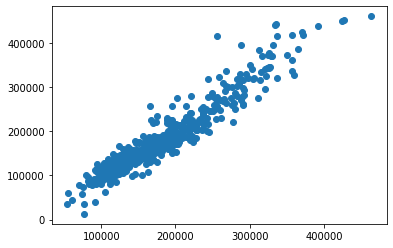

In [22]:
plt.scatter(exp_preds, np.exp(y_test))

In [23]:
# Calculate root mean squared error
np.sqrt(metrics.mean_squared_error(np.exp(y_test), exp_preds))

24634.269829684938

In [24]:
# Run model in stats for better formatting of coefficients and additional output
X = sm.add_constant(X_train)
y = y_train
model = sm.OLS(y, X).fit()

X_list_2= ["Intercept"] + X_list

In [25]:
model.summary(xname=X_list_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log Sale Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     652.2
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:42:43   Log-Likelihood:                 741.59
No. Observations:                1538   AIC:                            -1451.
Df Residuals:                    1522   BIC:                            -1366.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.4958      0.133     56.445      0.000       7.235       7.756
Log Gr Liv Area           0.3258      0.018     18.447      0.000       0.291       0.360
Overall Qual              0.1013      0.005     22.111      0.000       0.092       0.110
Age At Sale              -0.0016      0.000     -8.404      0.000      -0.002      -0.001
Log Lot Area              0.1093      0.010     11.376      0.000       0.090       0.128
Lot Area > 30k           -0.1927      0.038     -5.129      0.000      -0.266      -0.119
Log 1st Flr SF            0.0817      0.017      4.887      0.000       0.049       0.115
Kitchen Qual_TA          -0.0309      0.015     -2.031      0.042      -0.061      -0.001
Kitchen Qual_Gd          -0.0210      0.014     -1.468      0.142      -0.049       0.007
Years Since Remod/Add    -0.0025      0.000     -9.509      0.000      -0.003      -0.002
HasBsmtFullBath           0.0419      0.010      4.083      0.000       0.022       0.062
BsmtFin Type 1_Unf       -0.0633      0.011     -5.587      0.000      -0.085      -0.041
BsmtFin SF 1           2.371e-05   1.28e-05      1.847      0.065   -1.47e-06    4.89e-05
HasAvGdBsmtExposure       0.0314      0.010      3.100      0.002       0.012       0.051
HasFireplace              0.0592      0.009      6.509      0.000       0.041       0.077
Garage Cars               0.0425      0.007      6.000      0.000       0.029       0.056
==============================================================================
Omnibus:                      930.345   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27069.433
Skew:                          -2.306   Prob(JB):                         0.00
Kurtosis:                      23.029   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Shapley Values for easier interpretation of results

In [26]:
# See https://github.com/slundberg/shap for more info on this package
# We used this a lot in driver analysis at my former company, so I thought it might be helpful here
# print the JS visualization code to the notebook
shap.initjs()

In [27]:
explainer = shap.LinearExplainer(lm, X_train, feature_purturbation="interventional")
shap_values = explainer.shap_values(X_train)
# X_test_array = X_test.toarray()

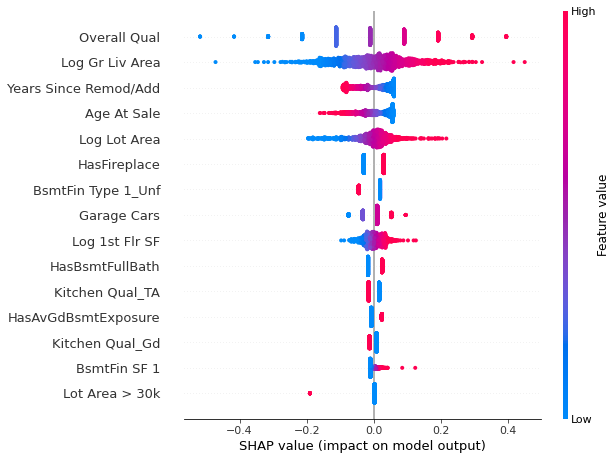

In [28]:
shap.summary_plot(shap_values, X_train, feature_names=X_list, max_display=20)

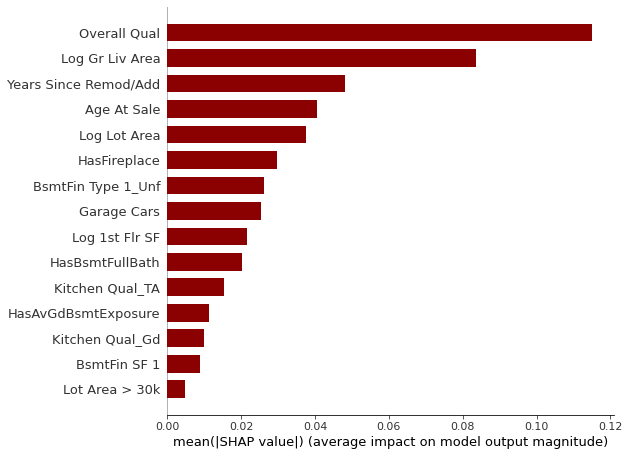

In [29]:
shap.summary_plot(shap_values, X_train, max_display=20, plot_type='bar', color='darkred', feature_names=X_list)

In [30]:
# shap.dependence_plot(ind="Lot Area", shap_values = shap_values, features=X_train, feature_names=X_list)

## Score test data for submission

In [31]:
#Get cleaned test data file
df_test = pd.read_csv("../datasets/test_cleaned.csv")

In [32]:
df_test.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Log Lot Area * Log 1st Flr SF,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3
0,2658,902301120,69.000000,9142,6,8,1910,1950,0,1020,...,62.122870,440,68.990654,15.128477,0.0,5376,57.217704,432.808356,36,216
1,2718,905108090,68.915097,9662,5,4,1977,1977,0,1967,...,69.592880,1160,69.592880,15.168530,0.0,841,57.521073,436.255049,25,125
2,2414,528218130,58.000000,17104,7,5,2006,2006,554,100,...,63.339196,852,71.256427,14.621100,0.0,0,53.444144,390.706093,49,343
3,1989,902207150,60.000000,8520,5,6,1923,2006,0,968,...,62.222030,960,62.222030,6.875232,0.0,84,47.268816,324.984082,25,125
4,625,535105100,68.271963,9500,6,5,1963,1963,609,785,...,66.310883,1028,66.310883,7.239933,0.0,2116,52.416624,379.492824,36,216


In [33]:
#Define X variables for test data
X_t = df_test[X_list]

In [34]:
#Make predictions on test data
preds_t = lm.predict(X_t)

In [35]:
#Transform predictions from log scale
exp_preds_t = np.exp(preds_t)

In [36]:
exp_preds_t.mean()

177166.74441536973

In [37]:
#Save predictions as SalePrice variable for test data in preparation for kaggle submission
df_test["SalePrice"] = exp_preds_t

In [38]:
df_test.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3,SalePrice
0,2658,902301120,69.000000,9142,6,8,1910,1950,0,1020,...,440,68.990654,15.128477,0.0,5376,57.217704,432.808356,36,216,133804.187393
1,2718,905108090,68.915097,9662,5,4,1977,1977,0,1967,...,1160,69.592880,15.168530,0.0,841,57.521073,436.255049,25,125,157377.556543
2,2414,528218130,58.000000,17104,7,5,2006,2006,554,100,...,852,71.256427,14.621100,0.0,0,53.444144,390.706093,49,343,240996.123440
3,1989,902207150,60.000000,8520,5,6,1923,2006,0,968,...,960,62.222030,6.875232,0.0,84,47.268816,324.984082,25,125,114267.583730
4,625,535105100,68.271963,9500,6,5,1963,1963,609,785,...,1028,66.310883,7.239933,0.0,2116,52.416624,379.492824,36,216,168354.239331


In [39]:
#Save file for submission to kaggle
df_test[["Id", "SalePrice"]].to_csv("../datasets/submission.csv", index=False)